<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/Financial-Engineering/blob/master/Spearman_Rank_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math


#Finding Correlations of Non-Linear Relationships
##a. Traditional (Pearson) Correlation

Find the correlation coefficient for the relationship between x and y.

0.8220252311231433


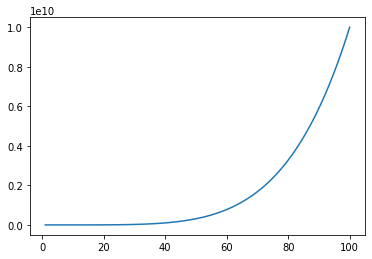

In [2]:
n = 100
x = np.linspace(1, n, n)
y = x**5

corr = np.corrcoef(x, y)[1][0]

print (corr)

plt.plot(x, y);

#b. Spearman Rank Correlation

Find the Spearman rank correlation coefficient for the relationship between x and y using the stats.rankdata function and the formula

rS = 1−(6∑ni=1d2i / n(n2−1))

where di
is the difference in rank of the ith pair of x and y values.

In [3]:
xrank = stats.rankdata(x, method='average')

yrank = stats.rankdata(y, method='average')

diffs = xrank - yrank

spr_corr = 1 - 6*np.sum( diffs*diffs )/( n*( n**2 - 1 ) )

print ("Because the ranks of the two data sets are perfectly correlated,\
the relationship between x and y has a Spearman rank correlation coefficient of", spr_corr)


Because the ranks of the two data sets are perfectly correlated,the relationship between x and y has a Spearman rank correlation coefficient of 1.0


Check your results against scipy's Spearman rank function. stats.spearmanr

In [4]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)

#Limitations of Spearman Rank Correlation
##a. Lagged Relationships

First, create a series b that is identical to a but lagged one step (b[i] = a[i-1]). Then, find the Spearman rank correlation coefficient of the relationship between a and b.

In [5]:
n = 100
a = np.random.normal(0, 1, n)

b = [0] + list(a[:(n-1)])

results = stats.spearmanr(a, b)

print ("Despite the underlying relationship being a perfect correlation,\
the one-step lag led to a Spearman rank correlation coefficient of\n", results.correlation, \
", meaning the test failed to detect the strong relationship.")

Despite the underlying relationship being a perfect correlation,the one-step lag led to a Spearman rank correlation coefficient of
 -0.20488448844884485 , meaning the test failed to detect the strong relationship.


##b. Non-Monotonic Relationships

First, create a series d using the relationship d=10c2−c+2
. Then, find the Spearman rank rorrelation coefficient of the relationship between c and d.

Despite an exact underlying relationship of d = 10c^2 - c + 2,the non-monotonic nature of the relationship led to a Spearman rank Correlation coefficient of -0.10091809180918092 , meaning the test failed to detect the relationship.


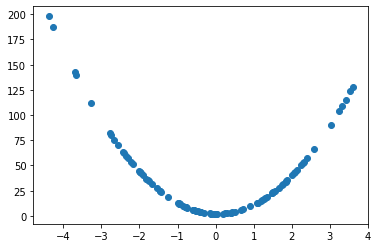

In [7]:
n = 100
c = np.random.normal(0, 2, n)

d = 10*c**2 - c + 2

results = stats.spearmanr(c, d)

print ("Despite an exact underlying relationship of d = 10c^2 - c + 2,\
the non-monotonic nature of the relationship led to a Spearman rank Correlation coefficient of", \
results.correlation, ", meaning the test failed to detect the relationship.")
plt.scatter(c, d);

##b. Rolling Spearman Rank Correlation

Repeat the above correlation for the first 60 days in the dataframe as opposed to just a single day. You should get a time series of Spearman rank correlations. From this we can start getting a better sense of how the factor correlates with forward returns.

What we're driving towards is known as an information coefficient. This is a very common way of measuring how predictive a model is. All of this plus much more is automated in our open source alphalens library. In order to see alphalens in action you can check out these resources:

In [0]:
rolling_corr = pd.Series(index=None, data=None)

for dt in prices_df.index[:60]:
    # The first trading day is actually 2015-1-2
    single_day_factor_values = my_factor[dt]

    # Because prices are indexed over the total time period, while the factor values dataframe
    # has a dynamic universe that excludes hard to trade stocks, each day there may be assets in 
    # the returns dataframe that are not present in the factor values dataframe. We have to filter down
    # as a result.
    single_day_forward_returns = forward_returns_df.loc[dt][single_day_factor_values.index]

    rolling_corr[dt] = stats.spearmanr(single_day_factor_values,
                              single_day_forward_returns).correlation



##b. Rolling Spearman Rank Correlation

Plot out the rolling correlation as a time series, and compute the mean and standard deviation.


Spearman rank correlation mean: nan
Spearman rank correlation std: nan


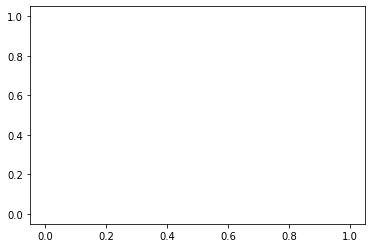

In [10]:
print ('Spearman rank correlation mean: %s' %(np.mean(rolling_corr)))
print ('Spearman rank correlation std: %s' %(np.std(rolling_corr)))
plt.plot(rolling_corr);